# --------------------------RECOMONDATION SYSTEM USING PYTHON-----------------------

Here i trying to make a basic movie recomondation system using python , machine learning .

In [2]:
# so let's import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
column_name = ['user_id','item_id','rating','timesamp']
df = pd.read_csv('u.data',sep='\t',names=column_name)

In [7]:
df.head()

,user_id,item_id,rating,timesamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


now lets go for item id and there movie title

In [8]:
movie_title = pd.read_csv('Movie_Id_Titles')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df =pd.merge(df,movie_title,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timesamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Now , We have successfully fetch the data the combined now lets for eda 

#  Exploratory Data Analysis 

In [11]:
sns.set_style('white')

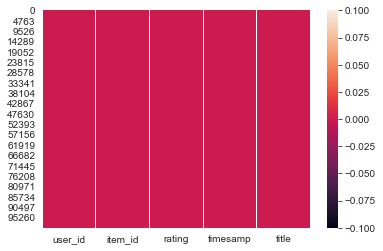

In [13]:
sns.heatmap(df.isnull())

In [16]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(6)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(6)

title
Star Wars (1977)               584
Contact (1997)                 509
Fargo (1996)                   508
Return of the Jedi (1983)      507
Liar Liar (1997)               485
English Patient, The (1996)    481
Name: rating, dtype: int64

In [18]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
rating['no_of_count']= pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,no_of_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


lets go for some visulization to understand more

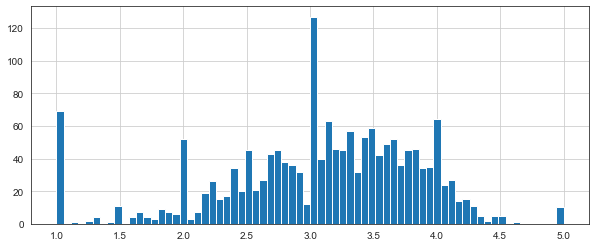

In [22]:
plt.figure(figsize=(10,4))
rating['rating'].hist(bins=70)

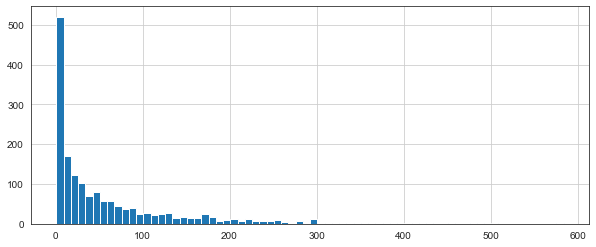

In [23]:
plt.figure(figsize=(10,4))
rating['no_of_count'].hist(bins=70)

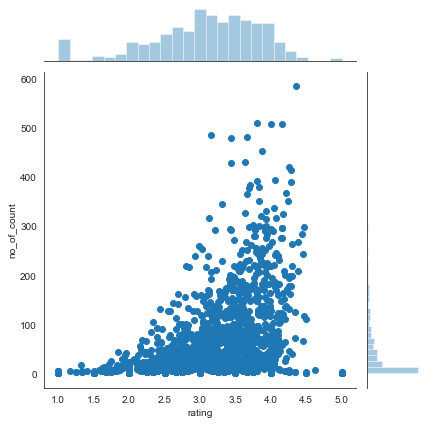

In [31]:
sns.jointplot(x=rating['rating'],y=rating['no_of_count'])

now our eda part is done let move toward recomonation model

# Recomondation Model 

In [33]:
movie_rating =df.pivot_table(values='rating',
    index='user_id',
    columns='title',)

In [34]:
movie_rating.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
rating.sort_values('no_of_count',ascending=False).head(7)

,rating,no_of_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478


so now let us take movie star war from action and liar liar from comedy 

In [43]:
starwar_rating = movie_rating['Star Wars (1977)']
liar2_rating = movie_rating['Liar Liar (1997)']

In [46]:
print(starwar_rating.head())
print('================================================')
print(liar2_rating.head())

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64
user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64


In [47]:
simillar_starwar = movie_rating.corrwith(starwar_rating)
simillar_liar2   = movie_rating.corrwith(liar2_rating)

C:\Users\utkar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\utkar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
corr_starwar = pd.DataFrame(simillar_starwar,columns=['correlation'])
corr_starwar.dropna(inplace =True)
corr_starwar.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [56]:
corr_liarliar = pd.DataFrame(simillar_liar2,columns=['correlation'])
corr_liarliar.dropna(inplace =True)
corr_liarliar.head()

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [60]:
corr_starwar.sort_values('correlation', ascending=False).head()

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [59]:
corr_liarliar.sort_values('correlation', ascending=False).head()

,correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0


so now we got movie that are highly correlated  lets go the check the count if the rating is there more than 100 number than only we are going to select

In [63]:
rating.head()

,rating,no_of_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [64]:
corr_starwar =corr_starwar.join(rating['no_of_count'])
corr_starwar.head()

,correlation,no_of_count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [69]:
corr_liarliar =corr_liarliar.join(rating['no_of_count'])
corr_liarliar.head()

,correlation,no_of_count
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [78]:
starwar_recomondation =corr_starwar[corr_starwar['no_of_count']>100].sort_values('correlation',ascending=False)

In [68]:
corr_liarliar.sort_values('correlation', ascending=False).head()

,correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0


same as star wars let us check for the movie liar liar

In [79]:
# let us check he count
liarliar_recomondation =corr_liarliar[corr_liarliar['no_of_count']>100].sort_values('correlation',ascending =False)

# so,our model is created let us see

In [82]:
starwar_recomondation.head()

,correlation,no_of_count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [76]:
liarliar_recomondation.head()

,correlation,no_of_count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
